In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---



---


 # ***EDA_General:***


---



---






### Importar librerias

In [1]:
# Importar librerias necesarias
import pandas as pd
import pyarrow.parquet as pq
import pyarrow as py
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns



---

### Carga del DataFrame 'df_eda_general' comprimido




In [2]:
#Se carga el archivo comprimido
df_eda_general = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/PI_1/Data/df_eda_limpio.parquet')




---


### **Descripción General:**

In [3]:
# Se genera un DataFrame sin repetir los Items asi tener la cantidad correcta de datos
df_eda_general_juegos_unicos = df_eda_general.drop_duplicates(subset=['Id_Item'])

In [4]:
# Caracteristicas de tamaño del DataFrame
df_eda_general_juegos_unicos.shape
print(f'El DataFrame posee la cantidad de Filas igual a: {df_eda_general.shape[0]} y de Columnas : {df_eda_general.shape[1]}')

El DataFrame posee la cantidad de Filas igual a: 116575 y de Columnas : 10


In [23]:
# Visualizacion de DataFrame y varables
df_eda_general_juegos_unicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2853 entries, 0 to 116573
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id_Item                2853 non-null   int64  
 1   Tiempo_Jugado          2853 non-null   int32  
 2   Generos                2853 non-null   object 
 3   Titulo                 2853 non-null   object 
 4   Precio                 2853 non-null   float32
 5   Desarrollador          2853 non-null   object 
 6   Año_Lanzamiento        2853 non-null   int32  
 7   Recomendado            2853 non-null   object 
 8   Analisis_sentimientos  2853 non-null   int32  
 9   Año_Posteo             2853 non-null   int32  
dtypes: float32(1), int32(4), int64(1), object(4)
memory usage: 189.5+ KB


El análisis exploratorio de datos (EDA) realizado en el conjunto de datos denominado "df_eda_general_juegos_unicos" revela valiosa información sobre los videojuegos disponibles en la plataforma. Con un total de 2853  registros, este conjunto de datos ofrece una visión detallada de diversas características, desde el tiempo jugado hasta el análisis de sentimientos asociado a las críticas. Este informe proporciona una visión general de los hallazgos más destacados, lo que permitirá tomar decisiones informadas y estratégicas.

In [6]:
# Se buscan los juegos de genero 'free' que son los que se juegan gratis
juegos_free = df_eda_general_juegos_unicos[(df_eda_general_juegos_unicos['Generos'] == 'free')]

# Cantidad de juegos 'free'
cantidad_juegos_free = len(juegos_free)
print(f'Cantidad de juegos Gratis: {cantidad_juegos_free}\n')
print(f'Filas que possen juegos Gratis:\n {juegos_free}')

Cantidad de juegos Gratis: 83

Filas que possen juegos Gratis:
         Id_Item  Tiempo_Jugado Generos               Titulo  Precio  \
12041      9880        2015448    free     champions online     0.0   
12053      9900        7393345    free     star trek online     0.0   
16102     39120        7366445    free                 rift     0.0   
16907     47410        5751018    free  stronghold kingdoms     0.0   
21988    104700        1978255    free            super mnc     0.0   
...         ...            ...     ...                  ...     ...   
116148   449140         128933    free             istrolid     0.0   
116261   461680            383    free       fpv air tracks     0.0   
116357   472060           2980    free          ortus regni     0.0   
116442   491130           6131    free          red trigger     0.0   
116546   510050           5151    free  you have 10 seconds     0.0   

             Desarrollador  Año_Lanzamiento Recomendado  \
12041      cryptic studi

In [7]:
valores_unicos = juegos_free['Precio'].value_counts()
print(f'Cantidad de valores en la columna precio de juegos gratis:\n{valores_unicos}')

Cantidad de valores en la columna precio de juegos gratis:
 0.000000      78
-1.000000       3
 160.910004     1
 19.980000      1
Name: Precio, dtype: int64


Podemos observar que el genero 'free' tiene 5 valores diferentes a 0. El valor (-1) se genero en el ETL a las celdas que figuraba 'free to play' se le dio ese valor para medificar la columna a Int.

In [ ]:
# Se busca el indice de las columnas 'Precio'diferente a '0' y se cambia el precio a '0'
df_eda_general_juegos_unicos['Precio'].replace(-1, 0, inplace=True)
df_eda_general_juegos_unicos['Precio'].replace(160.910004, 0, inplace=True)
df_eda_general_juegos_unicos['Precio'].replace(19.980000, 0, inplace=True)

Se modifican los valores distintos a (0), debido a que los juegos de genero 'free' son gratuitos, tienen un valor para aumentar caracteristicas(no sera tenido en cuenta en este analisis).

In [22]:
# Visualizacion de DataFrame y varables
df_eda_general_juegos_unicos['Precio'].describe()

count    2853.000000
mean       11.757644
std        18.405739
min         0.000000
25%         4.990000
50%         9.990000
75%        14.990000
max       771.710022
Name: Precio, dtype: float64

La mayoría de los juegos parecen tener precios relativamente bajos, ya que el 75% de ellos están por debajo de 14.99 dolares.
La presencia de un precio mínimo de 0 sugiere que hay juegos gratuitos en el conjunto de datos.
La desviación estándar relativamente alta indica una variabilidad significativa en los precios de los juegos.



---

# Analisis General del DataFrame






---


## Frecuencia de cada género


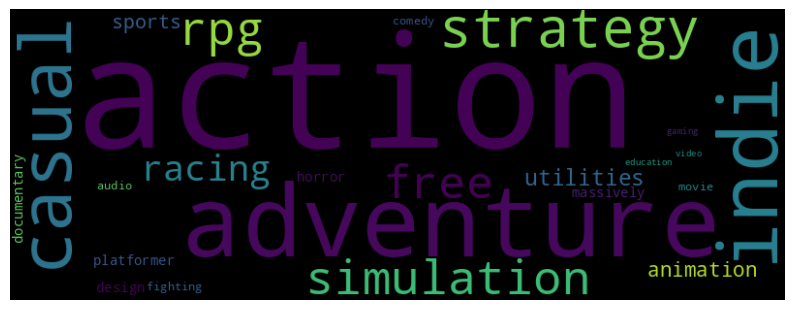


Top 5 generos mas frecuentes:
action       1483
adventure     421
indie         265
casual        205
strategy      120
Name: Generos, dtype: int64


In [16]:
# Cuenta la frecuencia de cada género
frecuencia_genero = df_eda_general_juegos_unicos['Generos'].value_counts()
top_5_genero = frecuencia_genero.head(5)

# Crea la nube de palabras
wordcloud = WordCloud(width=800, height=300, background_color='black').generate_from_frequencies(frecuencia_genero)

# Muestra la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
print(f'\nTop 5 generos mas frecuentes:\n{top_5_genero}')

## Promedio de precio por genero

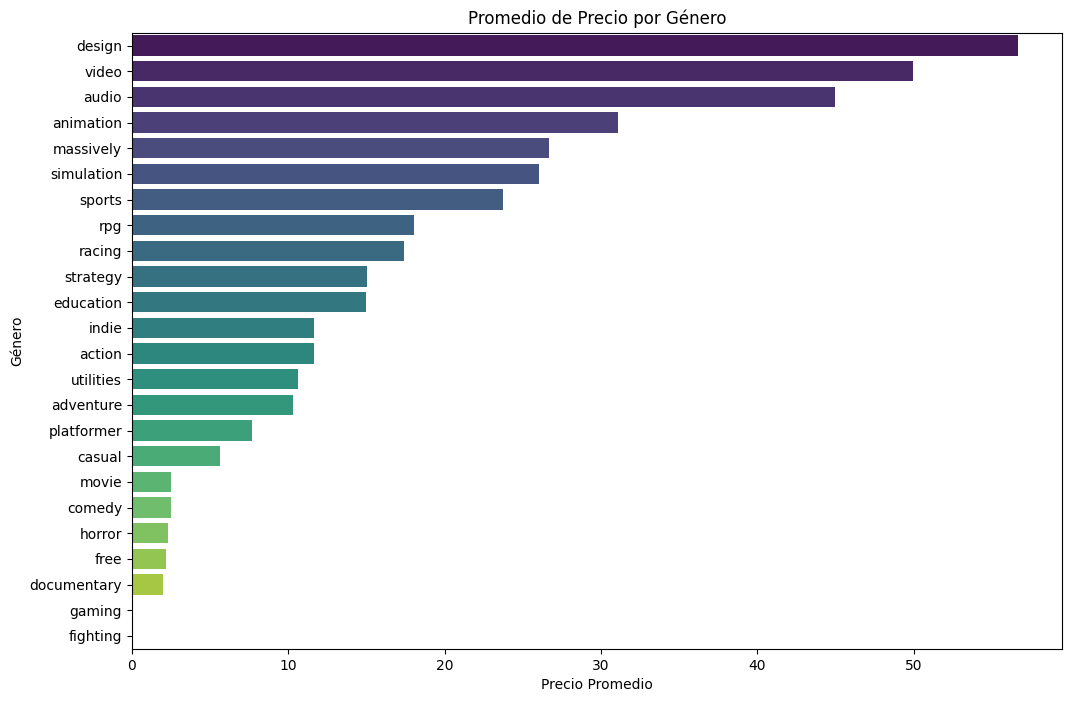


Promedio de Precio por Género:
Generos
design         56.656666
video          49.990002
audio          44.990002
animation      31.104445
massively      26.656668
simulation     26.064667
sports         23.740000
rpg            18.072353
racing         17.426382
strategy       15.056417
education      14.990000
indie          11.637471
action         11.628765
utilities      10.629090
adventure      10.298361
platformer      7.656666
casual          5.625951
movie           2.490000
comedy          2.490000
horror          2.326667
free            2.179398
documentary     1.993333
gaming          0.000000
fighting        0.000000
Name: Precio, dtype: float32


In [51]:
# Generar un DataFrame con el promedio de precio por género
promedio_precio_por_genero = df_eda_general_juegos_unicos.groupby('Generos')['Precio'].mean().sort_values(ascending=False)

# Configurar el tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un gráfico de barras horizontal
sns.barplot(x=promedio_precio_por_genero.values, y=promedio_precio_por_genero.index, palette='viridis')

# Títulos y etiquetas de los ejes
plt.title('Promedio de Precio por Género')
plt.xlabel('Precio Promedio')
plt.ylabel('Género')

# Mostrar el gráfico
plt.show()

# Imprimir los valores de los promedios por género
print("\nPromedio de Precio por Género:")
print(promedio_precio_por_genero)


El promedio de precio por genero, se observa que, los promedios mas altos, no son juegos, son herramientas para desarrollo, diseño, estudios. Las herramientas para trabajo profesional supera a los juegos.




---

## Porcentaje de juegos 'free' y 'pagos'



Mediante wordcloud es posible observar la frecuencia de los generos de manera action, adventure, indie, casual, strategy, etc. permite darnos una idea inicial de cuales son los juegos mas adquiridos por los usuarios.


Total de juegos: 2853
Cantidad de juegos gratis: 393
Cantidad de juegos pagos: 2460
Porcentaje de juegos gratis: 13.77%
Porcentaje de juegos pagos: 86.23%


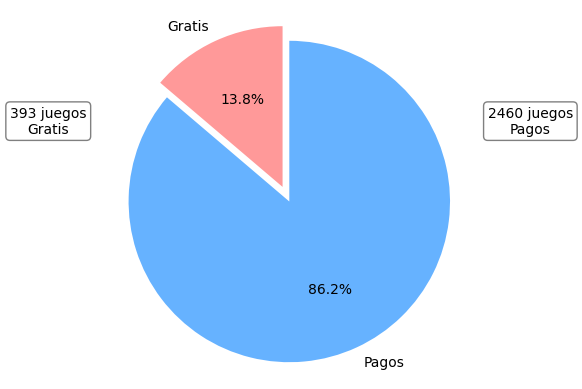

In [15]:
# Suponiendo que df_eda_general_juegos_unicos es tu DataFrame
total_juegos = len(df_eda_general_juegos_unicos)

# Contar la cantidad de juegos gratis y pagos
juegos_free = len(df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Precio'] == 0])
juegos_pagos = len(df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Precio'] != 0])

# Calcular los porcentajes
porcentaje_gratis = (juegos_free / total_juegos) * 100
porcentaje_pagos = (juegos_pagos / total_juegos) * 100

# Imprimir todas las variables
print(f'Total de juegos: {total_juegos}')
print(f'Cantidad de juegos gratis: {juegos_free}')
print(f'Cantidad de juegos pagos: {juegos_pagos}')
print(f'Porcentaje de juegos gratis: {porcentaje_gratis:.2f}%')
print(f'Porcentaje de juegos pagos: {porcentaje_pagos:.2f}%')

# Crear un gráfico de pastel
labels = ['Gratis', 'Pagos']
sizes = [porcentaje_gratis, porcentaje_pagos]
colors = ['#FF9999', '#66B2FF']
explode = (0.1, 0)  # Resaltar el segmento de juegos gratis

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Asegurar que el gráfico de pastel sea un círculo

# Agregar etiquetas al lado del gráfico
ax.annotate(f'{juegos_free} juegos\nGratis', xy=(-0.5, 0.5), xytext=(-1.5, 0.5), ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'))
ax.annotate(f'{juegos_pagos} juegos\nPagos', xy=(0.5, 0.5), xytext=(1.5, 0.5), ha='center', va='center', bbox=dict(boxstyle='round,pad=0.3', edgecolor='gray', facecolor='white'))

# Mostrar el gráfico
plt.show()




---

# Comentarios de los juegos

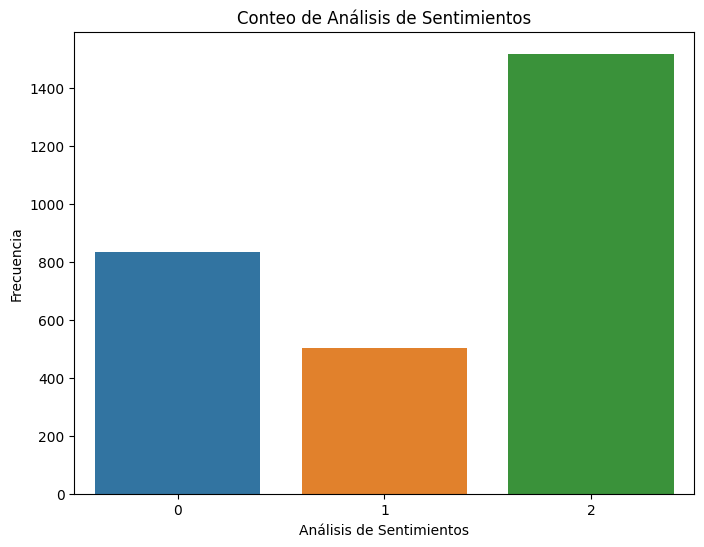

Total de muestras: 2853
Número de análisis positivos (1 y 2): 2019
Número de análisis negativos (0): 834
Porcentaje de análisis positivos: 70.77%


In [27]:
# Tamaño del gráfico
plt.figure(figsize=(8, 6))

# Grafico de barras
sns.countplot(x=df_eda_general_juegos_unicos['Analisis_sentimientos'])

# Título y etiquetas de los ejes
plt.title('Conteo de Análisis de Sentimientos')
plt.xlabel('Análisis de Sentimientos')
plt.ylabel('Frecuencia')

# Calcular el número total y el promedio
total_muestras = len(df_eda_general_juegos_unicos['Analisis_sentimientos'])
positivos = len(df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Analisis_sentimientos'].isin([1, 2])])
negativos = total_muestras - positivos
promedio_positivos = (positivos / total_muestras) * 100

# Mostrar el gráfico
plt.show()

# Agregar un print con la información
print(f'Total de muestras: {total_muestras}')
print(f'Número de análisis positivos (1 y 2): {positivos}')
print(f'Número de análisis negativos (0): {negativos}')
print(f'Porcentaje de análisis positivos: {promedio_positivos:.2f}%')


Se observa que la mayoria de los comentarios de los juegos son positivos.



---
## Recomendacion de juegos


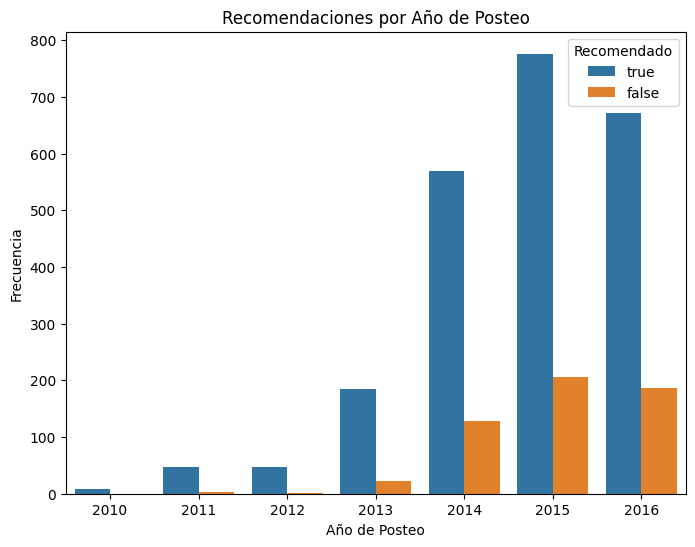

In [18]:
# Gráfico de barras apiladas de Recomendado por Año de Posteo
plt.figure(figsize=(8, 6))
sns.countplot(x=df_eda_general_juegos_unicos['Año_Posteo'], hue=df_eda_general_juegos_unicos['Recomendado'])
plt.title('Recomendaciones por Año de Posteo')
plt.xlabel('Año de Posteo')
plt.ylabel('Frecuencia')
plt.legend(title='Recomendado', loc='upper right')
plt.show()


La mayoria de los los comentarios se observan en el periodo 2013-2016, teniendo su punto maximo en 2015.



---

# Analisis de Top 5 de generos Mas jugados por Hora



---
## Total de horas jugadas por genero


In [80]:
# Obtener los 5 primeros géneros
top_5_generos_horas_jugadas = total_horas_por_genero.sort_values(ascending=False).head(5)
top_5_generos_horas_jugadas

Generos
action       3052330169
indie         548723501
strategy      235284993
rpg           109559643
adventure     106455018
Name: Tiempo_Jugado, dtype: int64

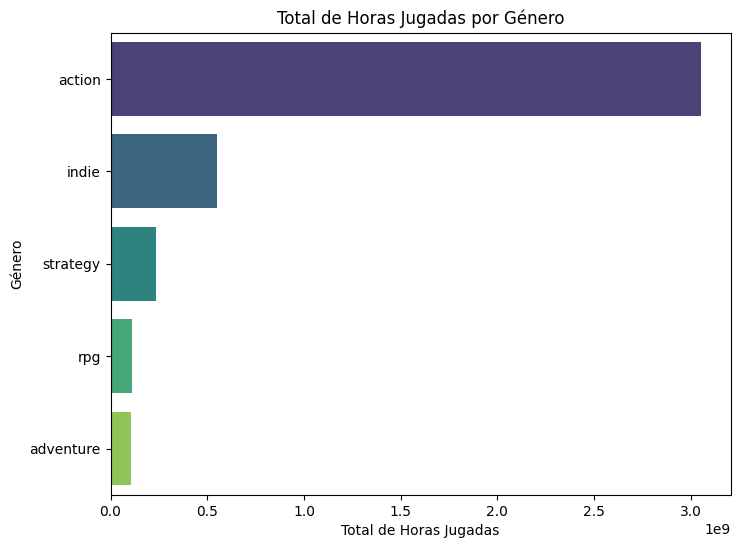

Generos
action       3052330169
indie         548723501
strategy      235284993
rpg           109559643
adventure     106455018
Name: Tiempo_Jugado, dtype: int64'
'

Top 5 generos mas frecuentes:
action       1483
adventure     421
indie         265
casual        205
strategy      120
Name: Generos, dtype: int64


In [81]:
# Se crea el DataFrame
total_horas_por_genero = df_eda_general_juegos_unicos.groupby('Generos')['Tiempo_Jugado'].sum().sort_values(ascending=False).head(5)


# Configurar el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear un gráfico de barras horizontal
sns.barplot(x=total_horas_por_genero.values, y=total_horas_por_genero.index, palette='viridis')

# Títulos y etiquetas de los ejes
plt.title('Total de Horas Jugadas por Género')
plt.xlabel('Total de Horas Jugadas')
plt.ylabel('Género')

# Mostrar el gráfico
plt.show()

# Mostrar el resultado
print(f"{total_horas_por_genero}'\n'")
print(f'\nTop 5 generos mas frecuentes:\n{top_5_genero}')

Como podemos observar hay una fuerte relacion positiva entre los generos mas jugados y mas frecuentes.



---

## Promedio de precio de los top 5 por genero mas jugados por hora

In [83]:
# Suponiendo que df_eda_general_juegos_unicos es tu DataFrame
# Obtener los 5 primeros géneros con más horas jugadas
top_5_generos_horas_jugadas = total_horas_por_genero.sort_values(ascending=False).head(5)

# Filtrar el DataFrame original por los juegos de los 5 primeros géneros
df_top_5_generos = df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Generos'].isin(top_5_generos_horas_jugadas.index)]

# Calcular el promedio de precio por género
promedio_precio_por_genero = df_top_5_generos.groupby('Generos')['Precio'].mean()

# Mostrar el resultado
print("Promedio de Precio por Género para los 5 Primeros Géneros con Más Horas Jugadas:")
print(promedio_precio_por_genero)
# Imprimir los valores de los promedios por género
print("\nPromedio de Precio por total:")
print(df_eda_general_juegos_unicos['Precio'].describe())


Promedio de Precio por Género para los 5 Primeros Géneros con Más Horas Jugadas:
Generos
action       11.628765
adventure    10.298361
indie        11.637471
rpg          18.072353
strategy     15.056417
Name: Precio, dtype: float32

Promedio de Precio por total:
count    2853.000000
mean       11.757644
std        18.405739
min         0.000000
25%         4.990000
50%         9.990000
75%        14.990000
max       771.710022
Name: Precio, dtype: float64


Los 3 Primeros generos (action, adventure, indie) mas jugados mantiene un precio similar al total: ($11.75). Siendo un precio accesible.



---

## Comentarios positivos y negativos del top 5

In [68]:
# Suponiendo que df_eda_general_juegos_unicos es tu DataFrame
# Obtener los 5 primeros géneros con más horas jugadas
top_5_generos_horas_jugadas = total_horas_por_genero.sort_values(ascending=False).head(5)

# Filtrar el DataFrame original por los juegos de los 5 primeros géneros
df_top_5_generos = df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Generos'].isin(top_5_generos_horas_jugadas.index)]

# Filtrar los comentarios positivos (2 y 1) y negativos (0) por género
df_comentarios_positivos = df_top_5_generos[df_top_5_generos['Analisis_sentimientos'].isin([1, 2])]
df_comentarios_negativos = df_top_5_generos[df_top_5_generos['Analisis_sentimientos'] == 0]

# Contar la cantidad de comentarios positivos y negativos por género
conteo_positivos = df_comentarios_positivos.groupby('Generos')['Analisis_sentimientos'].count()
conteo_negativos = df_comentarios_negativos.groupby('Generos')['Analisis_sentimientos'].count()

# Crear un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Positivo': conteo_positivos,
    'Negativo': conteo_negativos,
    'Total': conteo_positivos + conteo_negativos,
    'Porcentaje Positivo': (conteo_positivos / (conteo_positivos + conteo_negativos)) * 100,
    'Porcentaje Negativo': (conteo_negativos / (conteo_positivos + conteo_negativos)) * 100
})

# Mostrar el resultado
print("Conteo y Porcentaje de Comentarios Positivos y Negativos por Género:")
print(df_resultado)


Conteo y Porcentaje de Comentarios Positivos y Negativos por Género:
           Positivo  Negativo  Total  Porcentaje Positivo  Porcentaje Negativo
Generos                                                                       
action         1048       435   1483            70.667566            29.332434
adventure       291       130    421            69.121140            30.878860
indie           181        84    265            68.301887            31.698113
rpg              63        22     85            74.117647            25.882353
strategy         77        43    120            64.166667            35.833333


Los 5 generos mas jugados presentan una buena aceptacion, con un promedio que ronda los (69%).



---

## Informe de Análisis de Correlación para Géneros de Juegos



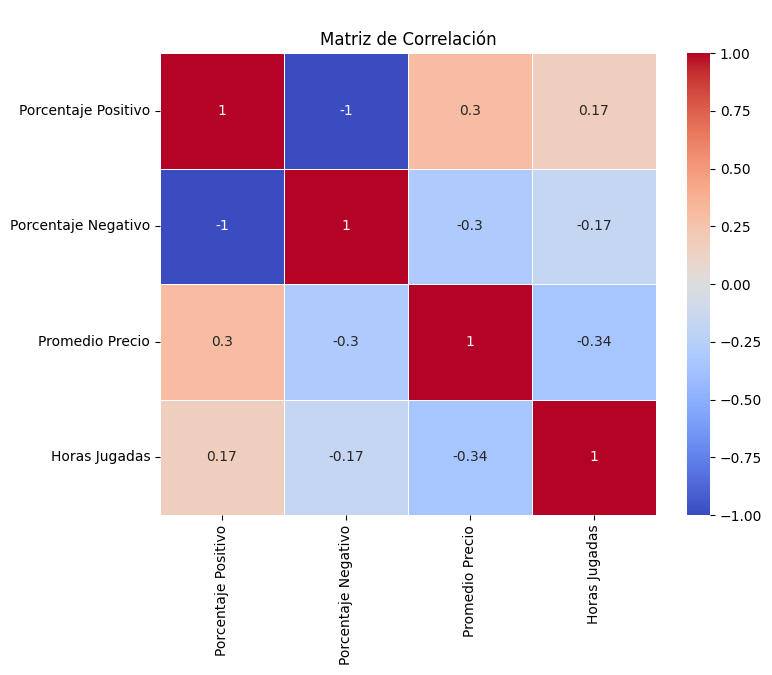

Matriz de Correlación:
                     Porcentaje Positivo  Porcentaje Negativo  \
Porcentaje Positivo             1.000000            -1.000000   
Porcentaje Negativo            -1.000000             1.000000   
Promedio Precio                 0.301671            -0.301671   
Horas Jugadas                   0.165154            -0.165154   

                     Promedio Precio  Horas Jugadas  
Porcentaje Positivo         0.301671       0.165154  
Porcentaje Negativo        -0.301671      -0.165154  
Promedio Precio             1.000000      -0.344963  
Horas Jugadas              -0.344963       1.000000  


In [77]:
# Obtener los 5 primeros géneros con más horas jugadas
top_5_generos_horas_jugadas = total_horas_por_genero.sort_values(ascending=False).head(5)

# Filtrar el DataFrame original por los juegos de los 5 primeros géneros
df_top_5_generos = df_eda_general_juegos_unicos[df_eda_general_juegos_unicos['Generos'].isin(top_5_generos_horas_jugadas.index)]

# Filtrar los comentarios positivos (2 y 1) y negativos (0) por género
df_comentarios_positivos = df_top_5_generos[df_top_5_generos['Analisis_sentimientos'].isin([1, 2])]
df_comentarios_negativos = df_top_5_generos[df_top_5_generos['Analisis_sentimientos'] == 0]

# Contar la cantidad de comentarios positivos y negativos por género
conteo_positivos = df_comentarios_positivos.groupby('Generos')['Analisis_sentimientos'].count()
conteo_negativos = df_comentarios_negativos.groupby('Generos')['Analisis_sentimientos'].count()

# Crear un DataFrame con los resultados
df_resultado = pd.DataFrame({
    'Porcentaje Positivo': (conteo_positivos / (conteo_positivos + conteo_negativos)) * 100,
    'Porcentaje Negativo': (conteo_negativos / (conteo_positivos + conteo_negativos)) * 100,
    'Promedio Precio': df_top_5_generos.groupby('Generos')['Precio'].mean(),
    'Horas Jugadas': df_top_5_generos.groupby('Generos')['Tiempo_Jugado'].sum()
})

# Calcular la correlación
correlacion = df_resultado.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('\nMatriz de Correlación')
plt.show()

# Mostrar el resultado
print("Matriz de Correlación:")
print(correlacion)

En este análisis, se examinó la correlación entre diversas variables relacionadas con los géneros de juegos más jugados en los últimos 5 años. Las variables evaluadas incluyeron el porcentaje de comentarios positivos y negativos, el promedio de precio y las horas jugadas para los géneros "action", "adventure", "indie", "rpg" y "strategy". A continuación, se presentan los hallazgos clave:

1.  Relación entre Comentarios y Precios:

El porcentaje de comentarios positivos tiene una correlación positiva moderada (0.30) con el promedio de precio. Esto sugiere que juegos con precios más altos pueden recibir una proporción mayor de comentarios positivos.

De manera inversa, el porcentaje de comentarios negativos tiene una correlación negativa moderada (-0.30) con el promedio de precio. Juegos con precios más bajos tienden a tener una proporción mayor de comentarios negativos.

2. Relación entre Comentarios y Horas Jugadas:

La correlación entre el porcentaje de comentarios positivos y las horas jugadas es positiva, aunque débil (0.17). Esto podría indicar que juegos con más comentarios positivos pueden tener, en promedio, más horas jugadas.

De manera similar, el porcentaje de comentarios negativos tiene una correlación negativa débil (-0.17) con las horas jugadas. Juegos con más comentarios negativos pueden tener menos horas jugadas, en promedio.

3. Precios y Horas Jugadas:

Existe una correlación negativa moderada (-0.34) entre el promedio de precio y las horas jugadas. Juegos con precios más altos tienden a tener, en promedio, menos horas jugadas.